# Test sample DPP for KSS poly

In [1]:
using Statistics, LinearAlgebra, Distributions, Plots, Polynomials, AMRVW, StatsBase

In [2]:
n = 100

100

In [3]:
try_Poly = []
for i in 1:100
    roots = AMRVW.roots(.√([binomial(big(n),k) for k in 0:n]).*randn(n+1))
    append!(try_Poly, real(roots[isreal.(roots)])) # use append!, otherwise cannot finish loop
end

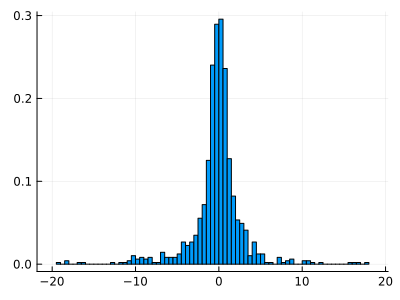

In [4]:
histogram(try_Poly[(try_Poly .> -20) .& (try_Poly .< 20)], size = (400,300) ,normalize=:pdf, label=false)

In [5]:
savefig("../figures/test-31.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-31.pdf"

In [6]:
length(try_Poly[(try_Poly .> -20) .& (try_Poly .< 20)])/100

9.74

In [7]:
function randprojDPP(Y)

    n = size(Y,2)
    𝓘 = fill(0,n)
    for k=1:n
        p = mean(abs.(Y).^2, dims=2)
        𝓘[k] = rand(Categorical(p[:]))
        Y=(Y*qr(Y[𝓘[k],:]).Q )[:,2:end] 
    end
    return(sort(𝓘))
end

function randDPP(Λ,Q)
    mask = rand.(Bernoulli.(Λ))
    return(randprojDPP(Q[:,mask]))
end

KerKSS(n, x, y) = √n / (1 + x*y)

KerKSS (generic function with 1 method)

In [8]:
x_span = -20:0.06:20
K = [KerKSS(n, x, y) for x in x_span, y in x_span] * (x_span[2] - x_span[1]) / π # correct normalization
Λ, Q = eigen(K)
#Λ[Λ .>= 1.0] .= 1.0
#Λ[Λ .<= 1e-9] .= 0.0
sum(Λ)

9.68211357473939

In [9]:
Λ

667-element Vector{Float64}:
 -477.44455664524776
 -144.18967408437055
 -124.91356202297055
 -115.32165784898368
  -76.62431251635343
  -69.36131904607274
  -63.29342873152101
  -60.584388441483405
  -57.61824880926196
  -46.665354149231085
    ⋮
   57.79793751656343
   60.768551294736234
   63.5027134146759
   69.53052182400955
   76.80641119489795
  115.52408912524834
  125.0922955880172
  144.37926402708933
  477.6351872993639

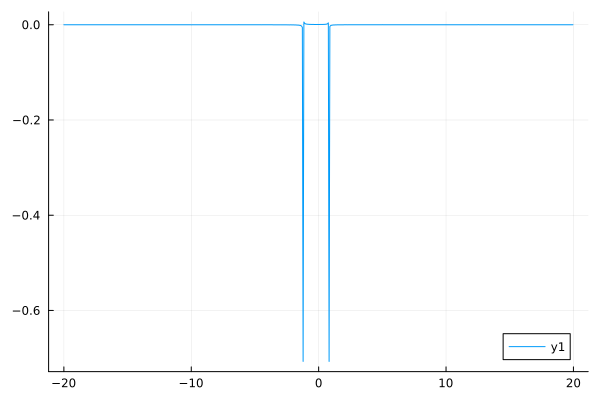

In [10]:
plot(x_span, (Q[:,1]))

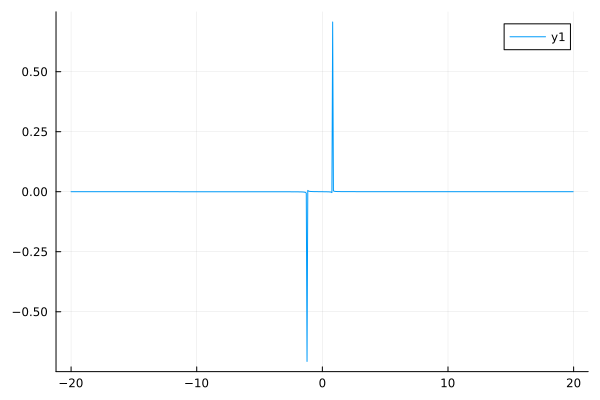

In [11]:
plot(x_span, (Q[:,end]))

In [12]:
function randM(Λ, Q)
    occupy_num = rand.(Geometric.(.9999 ./ (1 .+ abs.(Λ))))
    number = zeros(length(Λ))
    for i = 1:length(Λ)
        positions = sample(1:length(Λ), Weights((Q[:,i]).^2), occupy_num[i])
        for position in positions
            number[position] = number[position] + sign(Λ[i])
        end
    end
    # return number
    # calculate positions here
    setpos = []
    setneg = []
    for i = 1:length(Λ)
        if number[i] > 0
            append!(setpos, [i for j in 1:number[i]])
        else
            if number[i] < 0
                append!(setneg, [i for j in 1:abs(number[i])])
            end
        end
    end
    return setpos, setneg
end

randM (generic function with 1 method)

In [37]:
try_pos = []
try_neg = []
for i in 1:1000
    setpos, setneg = randM(Λ, Q) # use append!, otherwise cannot finish loop
    append!(try_pos, setpos)
    append!(try_neg, setneg)
end

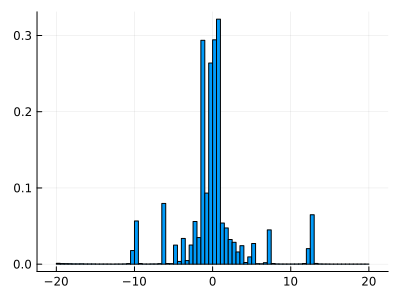

In [38]:
histogram(x_span[try_pos], size = (400,300) ,normalize=:pdf, label=false, bins = 80)

In [39]:
savefig("../figures/test-32.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-32.pdf"

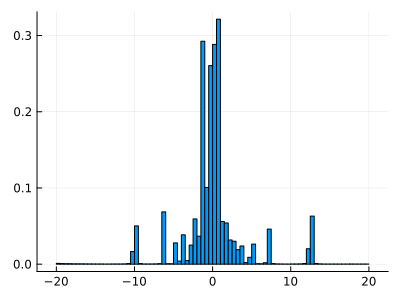

In [40]:
histogram(x_span[try_neg], size = (400,300) ,normalize=:pdf, label=false, bins = 80)

In [41]:
savefig("../figures/test-33.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-33.pdf"

In [48]:
x_draw = -20:.5:20
points = []
for i in 1:length(x_draw)-1
    left_x = x_draw[i]
    right_x = x_draw[i+1]
    num_points = length(findall((x_span[try_pos] .> left_x) .& (x_span[try_pos] .<= right_x))) - length(findall((x_span[try_neg] .> left_x) .& (x_span[try_neg] .<= right_x)))
    if num_points < 0
        append!(points, [(left_x+right_x)/2 for k in 1:abs(num_points)])
    end
end

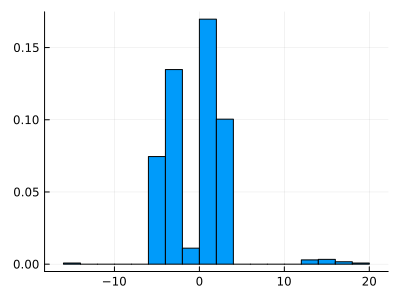

In [49]:
histogram(points, size = (400,300) ,normalize=:pdf, label=false,bins = 20)

In [50]:
savefig("../figures/test-34.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-34.pdf"